In [94]:
import tensorflow as tf
print(tf.__version__)

#from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.layers.experimental.preprocessing import Normalization

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

import seaborn as sns
sns.set(color_codes=True)

2.1.0


## 1. Reading dataset

In [95]:

bankdata = pd.read_csv('bank.csv')
bankdata


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2.1 Dropping columns like CustomerID

In [96]:
bankdata_1 = bankdata.drop(['RowNumber','CustomerId'], axis=1)
bankdata_1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [97]:
bankdata_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [98]:
bankdata_1.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
bankdata_1.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 3 Splitting Features as X_bankdata nd Target variable 'Exited' as y_bankdata

In [100]:
X_bankdata = bankdata_1.iloc[:, :-1]
X_bankdata.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## 2.2 Dropping 'surname' column

#### Surname is not a criteria to detarmine 'churn'. Hence dropping

In [101]:
X_bankdata.drop(['Surname'], axis=1, inplace=True)
X_bankdata

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#### One Hot Encoding for all 4 

In [102]:
oneHotCols = ['NumOfProducts', 'Tenure','Geography','Gender']
X_bankdata = pd.get_dummies(X_bankdata, columns = oneHotCols)

pd.set_option('display.max_columns', None)

X_bankdata

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,0.00,1,1,101348.88,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,608,41,83807.86,0,1,112542.58,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,502,42,159660.80,1,0,113931.57,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,699,39,0.00,0,0,93826.63,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,850,43,125510.82,1,1,79084.10,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,1,0,96270.64,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
9996,516,35,57369.61,1,1,101699.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
9997,709,36,0.00,0,1,42085.58,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
9998,772,42,75075.31,1,0,92888.52,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [103]:
X_bankdata.shape

(10000, 26)

#### Convert to float since during neural network calculations, float is needed

In [104]:
X_bankdata = X_bankdata.astype(float)

In [105]:
X_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Balance            10000 non-null  float64
 3   HasCrCard          10000 non-null  float64
 4   IsActiveMember     10000 non-null  float64
 5   EstimatedSalary    10000 non-null  float64
 6   NumOfProducts_1    10000 non-null  float64
 7   NumOfProducts_2    10000 non-null  float64
 8   NumOfProducts_3    10000 non-null  float64
 9   NumOfProducts_4    10000 non-null  float64
 10  Tenure_0           10000 non-null  float64
 11  Tenure_1           10000 non-null  float64
 12  Tenure_2           10000 non-null  float64
 13  Tenure_3           10000 non-null  float64
 14  Tenure_4           10000 non-null  float64
 15  Tenure_5           10000 non-null  float64
 16  Tenure_6           1000

In [106]:
X_bankdata

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,0.00,1.0,1.0,101348.88,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,83807.86,0.0,1.0,112542.58,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,159660.80,1.0,0.0,113931.57,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,0.00,0.0,0.0,93826.63,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,125510.82,1.0,1.0,79084.10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,0.00,1.0,0.0,96270.64,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,516.0,35.0,57369.61,1.0,1.0,101699.77,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9997,709.0,36.0,0.00,0.0,1.0,42085.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,772.0,42.0,75075.31,1.0,0.0,92888.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [107]:
#X_bankdata_norm = X_bankdata.normalize(X_bankdata)
X_bankdata_norm = ( X_bankdata[['CreditScore','Age','Balance','EstimatedSalary']] - X_bankdata[['CreditScore','Age','Balance','EstimatedSalary']].mean() ) / (X_bankdata[['CreditScore','Age','Balance','EstimatedSalary']].std())

X_bankdata_norm

,CreditScore,Age,Balance,EstimatedSalary
0,-0.326205,0.293503,-1.225786,0.021885
1,-0.440014,0.198154,0.117344,0.216523
2,-1.536717,0.293503,1.332987,0.240675
3,0.501496,0.007456,-1.225786,-0.108912
4,2.063781,0.388852,0.785689,-0.365258
...,...,...,...,...
9995,1.246426,0.007456,-1.225786,-0.066416
9996,-1.391870,-0.373939,-0.306363,0.027987
9997,0.604958,-0.278590,-1.225786,-1.008593
9998,1.256772,0.293503,-0.022606,-0.125224


In [108]:

X_bankdata_norm.rename(columns={"CreditScore":"CreditScore_norm", "Age": "Age_norm", "Balance": "Balance_norm", "EstimatedSalary": "EstimatedSalary_norm"}, inplace=True)

In [109]:
X_bankdata = pd.concat([X_bankdata_norm,X_bankdata], axis = 1)
X_bankdata

,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326205,0.293503,-1.225786,0.021885,619.0,42.0,0.00,1.0,1.0,101348.88,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.440014,0.198154,0.117344,0.216523,608.0,41.0,83807.86,0.0,1.0,112542.58,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.536717,0.293503,1.332987,0.240675,502.0,42.0,159660.80,1.0,0.0,113931.57,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.501496,0.007456,-1.225786,-0.108912,699.0,39.0,0.00,0.0,0.0,93826.63,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.063781,0.388852,0.785689,-0.365258,850.0,43.0,125510.82,1.0,1.0,79084.10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246426,0.007456,-1.225786,-0.066416,771.0,39.0,0.00,1.0,0.0,96270.64,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,-1.391870,-0.373939,-0.306363,0.027987,516.0,35.0,57369.61,1.0,1.0,101699.77,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9997,0.604958,-0.278590,-1.225786,-1.008593,709.0,36.0,0.00,0.0,1.0,42085.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,1.256772,0.293503,-0.022606,-0.125224,772.0,42.0,75075.31,1.0,0.0,92888.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [110]:
X_bankdata.columns

Index(['CreditScore_norm', 'Age_norm', 'Balance_norm', 'EstimatedSalary_norm',
       'CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4', 'Tenure_0', 'Tenure_1',
       'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7',
       'Tenure_8', 'Tenure_9', 'Tenure_10', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [111]:
cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

In [113]:
X_bankdata.drop(X_bankdata[cols] , axis = 1 , inplace = True)
X_bankdata

,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326205,0.293503,-1.225786,0.021885,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.440014,0.198154,0.117344,0.216523,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-1.536717,0.293503,1.332987,0.240675,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.501496,0.007456,-1.225786,-0.108912,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.063781,0.388852,0.785689,-0.365258,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246426,0.007456,-1.225786,-0.066416,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,-1.391870,-0.373939,-0.306363,0.027987,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9997,0.604958,-0.278590,-1.225786,-1.008593,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,1.256772,0.293503,-0.022606,-0.125224,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## 3.1 Target variable

In [114]:
y_bankdata = bankdata_1.iloc[:,-1]
y_bankdata.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [115]:
y_bankdata.shape

(10000,)

## 4 Dividing into Train and Test data

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_bankdata, y_bankdata, test_size = 0.3, random_state = 3)

In [117]:
X_train.head()

,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5795,0.604958,0.007456,-1.225786,-0.762924,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1490,1.515429,-0.755334,-1.225786,0.309968,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3807,-1.867798,-0.850683,0.395127,-0.855211,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3042,1.908587,-0.946032,0.864368,0.107568,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4064,-0.253781,0.007456,0.894301,-0.845451,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [118]:
X_train.shape

(7000, 26)

In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 5795 to 5994
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore_norm      7000 non-null   float64
 1   Age_norm              7000 non-null   float64
 2   Balance_norm          7000 non-null   float64
 3   EstimatedSalary_norm  7000 non-null   float64
 4   HasCrCard             7000 non-null   float64
 5   IsActiveMember        7000 non-null   float64
 6   NumOfProducts_1       7000 non-null   float64
 7   NumOfProducts_2       7000 non-null   float64
 8   NumOfProducts_3       7000 non-null   float64
 9   NumOfProducts_4       7000 non-null   float64
 10  Tenure_0              7000 non-null   float64
 11  Tenure_1              7000 non-null   float64
 12  Tenure_2              7000 non-null   float64
 13  Tenure_3              7000 non-null   float64
 14  Tenure_4              7000 non-null   float64
 15  Tenure_5          

In [120]:
X_test.head()

,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5876,0.553227,0.007456,0.561548,1.728288,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6555,-0.098587,-0.373939,-1.225786,-0.120696,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1448,-0.988366,0.674898,0.703669,1.349834,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3351,-1.826413,-0.469288,1.599834,1.045427,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
231,-0.419321,0.102805,-1.225786,-0.658274,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [121]:
X_test.shape

(3000, 26)

In [122]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 5876 to 676
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CreditScore_norm      3000 non-null   float64
 1   Age_norm              3000 non-null   float64
 2   Balance_norm          3000 non-null   float64
 3   EstimatedSalary_norm  3000 non-null   float64
 4   HasCrCard             3000 non-null   float64
 5   IsActiveMember        3000 non-null   float64
 6   NumOfProducts_1       3000 non-null   float64
 7   NumOfProducts_2       3000 non-null   float64
 8   NumOfProducts_3       3000 non-null   float64
 9   NumOfProducts_4       3000 non-null   float64
 10  Tenure_0              3000 non-null   float64
 11  Tenure_1              3000 non-null   float64
 12  Tenure_2              3000 non-null   float64
 13  Tenure_3              3000 non-null   float64
 14  Tenure_4              3000 non-null   float64
 15  Tenure_5           

In [123]:
y_train.head()

5795    0
1490    0
3807    0
3042    0
4064    1
Name: Exited, dtype: int64

In [124]:
y_train.shape

(7000,)

In [125]:
y_test.head()

5876    0
6555    0
1448    1
3351    0
231     0
Name: Exited, dtype: int64

In [126]:
y_test.shape

(3000,)

In [127]:
# Print predicted 1 and 0's 
unique1, counts1 = np.unique(y_test, return_counts = True)
print('\nThe number of True 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique1, counts1)))


The number of True 1 (Exited) and 0 ( Not Exited) are :
 {0: 2381, 1: 619}


##  Using the  NormalizedTrain and Test data

In [128]:
X_train

,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5795,0.604958,0.007456,-1.225786,-0.762924,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1490,1.515429,-0.755334,-1.225786,0.309968,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3807,-1.867798,-0.850683,0.395127,-0.855211,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3042,1.908587,-0.946032,0.864368,0.107568,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4064,-0.253781,0.007456,0.894301,-0.845451,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,0.263532,-0.850683,-1.225786,1.373251,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9160,1.318850,-1.422776,-1.225786,1.090566,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9859,0.284224,1.533037,0.851975,1.461209,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1688,-0.512438,0.198154,-1.225786,1.052274,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [129]:
X_test

,CreditScore_norm,Age_norm,Balance_norm,EstimatedSalary_norm,HasCrCard,IsActiveMember,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5876,0.553227,0.007456,0.561548,1.728288,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6555,-0.098587,-0.373939,-1.225786,-0.120696,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1448,-0.988366,0.674898,0.703669,1.349834,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3351,-1.826413,-0.469288,1.599834,1.045427,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
231,-0.419321,0.102805,-1.225786,-0.658274,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,-1.971260,0.674898,0.818529,0.467085,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5373,1.298157,-0.850683,-1.225786,-0.629127,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
485,0.822230,-0.373939,1.265832,-0.806322,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5657,-1.598795,-0.850683,0.232022,-1.256957,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 6 Initializing & Building multiple models and implementaing the models

### 6.1 Case 1- Compiling model . Will use the gradient descent optimization , with 'binary_crossentropy' loss function

### Creating Model using Keras

In [130]:
bankdata_model = Sequential()

### Adding layers to the model.

In [131]:
bankdata_model.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model.add(Dense(32, activation = 'relu'))
bankdata_model.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [132]:
gd_optimizer = optimizers.Adam(lr = 0.001)

In [133]:
bankdata_model.compile(optimizer = gd_optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [134]:
bankdata_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1728      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [135]:
bankdata_model.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 3s 463us/sample - loss: 0.5619 - accuracy: 0.7759
Epoch 2/40
7000/7000 [==============================] - 0s 9us/sample - loss: 0.4531 - accuracy: 0.7986
Epoch 3/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4203 - accuracy: 0.8043
Epoch 4/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.4009 - accuracy: 0.8184
Epoch 5/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3892 - accuracy: 0.8227
Epoch 6/40
7000/7000 [==============================] - 0s 3us/sample - loss: 0.3811 - accuracy: 0.8284
Epoch 7/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3748 - accuracy: 0.8341
Epoch 8/40
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3703 - accuracy: 0.8387
Epoch 9/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3663 - accuracy: 0.8410
Epoch 10/40
7000/7000 [=================

In [136]:
bankdata_model.history.history.keys()

dict_keys(['loss', 'accuracy'])

In [137]:
print('Train data loss is :', bankdata_model.history.history['loss'])

Train data loss is : [0.5618745642048972, 0.4530858908380781, 0.42027885147503447, 0.40089368394442965, 0.38921252318790983, 0.3811006716319493, 0.374801550592695, 0.37025623662131174, 0.36628484087330954, 0.36281521192618776, 0.3603008006300245, 0.3576554570879255, 0.3550064606325967, 0.35279819795063566, 0.351118483713695, 0.34908572903701235, 0.34729265528065817, 0.3459270851952689, 0.3443725194249834, 0.3435491642781666, 0.3417921875204359, 0.3402589112520218, 0.33873256189482553, 0.3379341619355338, 0.337166143315179, 0.3357935015644346, 0.33436048243727, 0.3333751644407, 0.33239981532096863, 0.3315837596143995, 0.33094710963112967, 0.32981944722788675, 0.32938454832349506, 0.32832723430224825, 0.3276375894035612, 0.3266885642494474, 0.32649547713143484, 0.326016475047384, 0.3254755714109966, 0.3243172935077122]


In [138]:
print('Train data loss is :', bankdata_model.history.history['loss'][-1])

Train data loss is : 0.3243172935077122


In [139]:
print('Train data accuracy is :', bankdata_model.history.history['accuracy'][-1])

Train data accuracy is : 0.86542857


### Model Evaluation 

In [140]:
eva_results = bankdata_model.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 123us/sample - loss: 0.3552 - accuracy: 0.8597


In [141]:
print(bankdata_model.metrics_names)
print(eva_results)

['loss', 'accuracy']
[0.3551533633073171, 0.85966665]


In [142]:
print('Test data loss is :', eva_results[0])

Test data loss is : 0.3551533633073171


In [143]:
print('Test data accuracy is :', eva_results[1])

Test data accuracy is : 0.85966665


### 7.1 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [144]:
Y_pred_class = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class)

3000/3000 [==============================] - 0s 18us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [145]:
Y_pred_value = bankdata_model.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value)

3000/3000 [==============================] - 0s 10us/sample
[[0.20951578]
 [0.0121375 ]
 [0.6606856 ]
 ...
 [0.1487247 ]
 [0.05378688]
 [0.1836236 ]]


In [146]:
Y_pred_value_class = (Y_pred_value > 0.5).astype(int)
print(Y_pred_value_class)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


## 8.1 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [147]:
# Y_pred_class = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer Case1:'+ str(bankdata_model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class)))
confusion_matrix(y_test.values, Y_pred_class)

3000/3000 [==============================] - 0s 32us/sample - loss: 0.3552 - accuracy: 0.8597
Accuracy of Model with Adam optimizer Case1:0.85966665
Recall_score: 0.44749596122778673
Precision_score: 0.7780898876404494
F-score: 0.5682051282051283


array([[2302,   79],
       [ 342,  277]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [148]:
# Y_pred_value_class = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer Case 1 :'+ str(bankdata_model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class)))
confusion_matrix(y_test.values, Y_pred_value_class)

3000/3000 [==============================] - 0s 51us/sample - loss: 0.3552 - accuracy: 0.8597
Accuracy of Model with Adam optimizer Case 1 :0.85966665
Recall_score: 0.44749596122778673
Precision_score: 0.7780898876404494
F-score: 0.5682051282051283


array([[2302,   79],
       [ 342,  277]], dtype=int64)

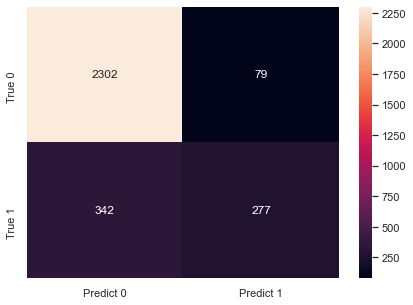

In [149]:
cm_adam = confusion_matrix(y_test.values, Y_pred_value_class)
df_cm_adam = pd.DataFrame(cm_adam, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam, annot=True, fmt = 'd');

#### creating a results df to hold results of diff runs

In [150]:
results_df = pd.DataFrame([[1,'Adam',3,64,'elu',32,'relu',1,'sigmoid', 0, 'No layer',0,'No layer',0,0, 0,0,0,0,0]], 
                          columns = ['Case X','Model details','Num of layers','Layer 1 nodes','Layer1 Act F','Layer 2 nodes','Layer2 Act F',
                            'Layer 3 nodes','Layer3 Act F', 'Layer 4 nodes', 'Layer4 Act F','Layer 5 nodes', 'Layer5 Act F',
                                     'Train data-loss','Train data-Accuracy', 'Test data-Loss',
                            'Test data-Accuracy','Recall score','Precision score','F score'])

row_index = 0

In [151]:
row_index = row_index + 1

results_df_data = [ 1,'Adam',3,64,'elu',32,'relu',1,'sigmoid', 0, 'No layer', 0,'No layer',
                   bankdata_model.history.history['loss'][-1],
                            bankdata_model.history.history['accuracy'][-1], eva_results[0],eva_results[1], 
                            recall_score(y_test.values,Y_pred_value_class), precision_score(y_test.values, Y_pred_value_class), 
                            f1_score(y_test.values,Y_pred_value_class)]
results_df.loc[row_index] = results_df_data
results_df = results_df.drop([0])

In [152]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.77809,0.568205


### 6.2  Case 2 using Nadam optimizer

##### Creating Model using Keras

In [153]:
bankdata_model_nadam = Sequential()

### Adding layers to the model.

In [154]:
bankdata_model_nadam.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model_nadam.add(Dense(32, activation = 'relu'))
bankdata_model_nadam.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [155]:
gd_optimizer_nadam = optimizers.Nadam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [156]:
bankdata_model_nadam.compile(optimizer = gd_optimizer_nadam, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [157]:
bankdata_model_nadam.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [158]:
bankdata_model_nadam.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 1s 114us/sample - loss: 0.5520 - accuracy: 0.7413
Epoch 2/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.4486 - accuracy: 0.8021
Epoch 3/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4125 - accuracy: 0.8097
Epoch 4/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3930 - accuracy: 0.8223
Epoch 5/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3808 - accuracy: 0.8331
Epoch 6/40
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3720 - accuracy: 0.8370
Epoch 7/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3662 - accuracy: 0.8416
Epoch 8/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3621 - accuracy: 0.8421
Epoch 9/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3584 - accuracy: 0.8466
Epoch 10/40
7000/7000 [=================

### Model Evaluation 

In [159]:
eva_results_nadam = bankdata_model_nadam.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 69us/sample - loss: 0.3508 - accuracy: 0.8613


In [160]:
print(bankdata_model_nadam.metrics_names)
print(eva_results_nadam)

['loss', 'accuracy']
[0.3507893248399099, 0.8613333]


### 7.2 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [161]:
Y_pred_class_nadam = bankdata_model_nadam.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam)

3000/3000 [==============================] - 0s 23us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [162]:
Y_pred_value_nadam = bankdata_model_nadam.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam)

3000/3000 [==============================] - 0s 5us/sample
[[0.19366656]
 [0.00911786]
 [0.7622342 ]
 ...
 [0.19083332]
 [0.03651527]
 [0.14715558]]


In [163]:
Y_pred_value_class_nadam = (Y_pred_value_nadam > 0.5).astype(int)
print(Y_pred_value_class_nadam)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


## 8.2 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [164]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam)))
confusion_matrix(y_test.values, Y_pred_class_nadam)

3000/3000 [==============================] - 0s 33us/sample - loss: 0.3508 - accuracy: 0.8613
Accuracy of Model with Nadam optimizer :0.8613333
Recall_score: 0.46526655896607433
Precision_score: 0.7721179624664879
F-score: 0.5806451612903225


array([[2296,   85],
       [ 331,  288]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [165]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam)

3000/3000 [==============================] - 0s 40us/sample - loss: 0.3508 - accuracy: 0.8613
Accuracy of Model with Nadam optimizer :0.8613333
Recall_score: 0.46526655896607433
Precision_score: 0.7721179624664879
F-score: 0.5806451612903225


array([[2296,   85],
       [ 331,  288]], dtype=int64)

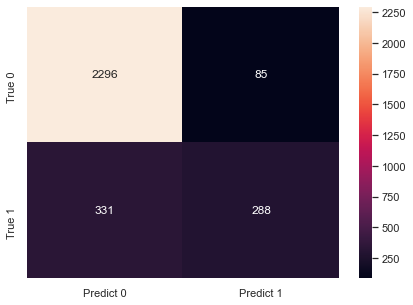

In [166]:
cm_nadam = confusion_matrix(y_test.values, Y_pred_value_class_nadam)
df_cm_nadam = pd.DataFrame(cm_nadam, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam, annot=True, fmt = 'd');

In [167]:
row_index = row_index + 1

results_df_data = [ 2,'Nadam',3,64,'elu',32,'relu',1,'sigmoid', 0, 'No layer', 0,'No layer',
                   bankdata_model_nadam.history.history['loss'][-1],
                            bankdata_model_nadam.history.history['accuracy'][-1], eva_results_nadam[0],eva_results_nadam[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam), precision_score(y_test.values, 
                            Y_pred_value_class_nadam), f1_score(y_test.values,Y_pred_value_class_nadam)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [168]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645


### 6.3  Case 3 using Adam optimizer  with LeakyRelu activation function , since it gives a small graddient when z<0

##### Creating Model using Keras

In [169]:
bankdata_model_adam2 = Sequential()

### Adding layers to the model. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [170]:
bankdata_model_adam2.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model_adam2.add(Dense(32, LeakyReLU(alpha=0.1)))
bankdata_model_adam2.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [171]:
gd_optimizer_adam2 = optimizers.Adam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [172]:
bankdata_model_adam2.compile(optimizer = gd_optimizer_adam2, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [173]:
bankdata_model_adam2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [174]:
bankdata_model_adam2.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 0s 70us/sample - loss: 0.7105 - accuracy: 0.4873
Epoch 2/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.5243 - accuracy: 0.7946
Epoch 3/40
7000/7000 [==============================] - 0s 8us/sample - loss: 0.4522 - accuracy: 0.8001
Epoch 4/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4247 - accuracy: 0.8049
Epoch 5/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.4080 - accuracy: 0.8134
Epoch 6/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3959 - accuracy: 0.8196
Epoch 7/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3861 - accuracy: 0.8263
Epoch 8/40
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3784 - accuracy: 0.8331
Epoch 9/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3729 - accuracy: 0.8380
Epoch 10/40
7000/7000 [==================

### Model Evaluation 

In [175]:
eva_results_adam2 = bankdata_model_adam2.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 77us/sample - loss: 0.3503 - accuracy: 0.8630


In [176]:
print(bankdata_model_adam2.metrics_names)
print(eva_results_adam2)

['loss', 'accuracy']
[0.3502750973701477, 0.863]


### 7.3 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [177]:
Y_pred_class_adam2 = bankdata_model_adam2.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_adam2)

3000/3000 [==============================] - 0s 27us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [178]:
Y_pred_value_adam2 = bankdata_model_adam2.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_adam2)

3000/3000 [==============================] - 0s 5us/sample
[[0.15356085]
 [0.01089112]
 [0.7225771 ]
 ...
 [0.14705773]
 [0.04153422]
 [0.14662361]]


In [179]:
Y_pred_value_class_adam2 = (Y_pred_value_adam2 > 0.5).astype(int)
print(Y_pred_value_class_adam2)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_adam2, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2632, 1: 368}


## 8.3 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [180]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_adam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_adam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_adam2)))
confusion_matrix(y_test.values, Y_pred_class_adam2)

3000/3000 [==============================] - 0s 36us/sample - loss: 0.3503 - accuracy: 0.8630
Accuracy of Model with Adam optimizer :0.863
Recall_score: 0.46526655896607433
Precision_score: 0.782608695652174
F-score: 0.5835866261398177


array([[2301,   80],
       [ 331,  288]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [181]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_adam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_adam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_adam2)))
confusion_matrix(y_test.values, Y_pred_value_class_adam2)

3000/3000 [==============================] - 0s 36us/sample - loss: 0.3503 - accuracy: 0.8630
Accuracy of Model with Adam optimizer :0.863
Recall_score: 0.46526655896607433
Precision_score: 0.782608695652174
F-score: 0.5835866261398177


array([[2301,   80],
       [ 331,  288]], dtype=int64)

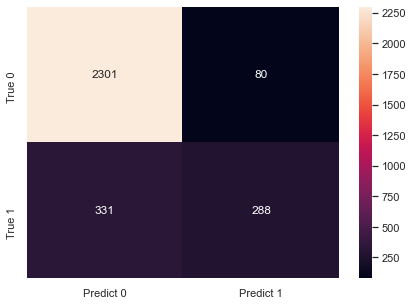

In [182]:
cm_adam2 = confusion_matrix(y_test.values, Y_pred_value_class_adam2)
df_cm_adam2 = pd.DataFrame(cm_adam2, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam2, annot=True, fmt = 'd');

In [183]:
row_index = row_index + 1

results_df_data = [ 3,'Adam',3,64,'elu',32,'LeakyReLU',1,'sigmoid', 0, 'No layer',0,'No layer',
                   bankdata_model_adam2.history.history['loss'][-1],
                            bankdata_model_adam2.history.history['accuracy'][-1], eva_results_adam2[0],eva_results_adam2[1], 
                            recall_score(y_test.values,Y_pred_value_class_adam2), precision_score(y_test.values, 
                            Y_pred_value_class_adam2), f1_score(y_test.values,Y_pred_value_class_adam2)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [184]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587


### 6.4 Case 4 using Adam optimizer  with relu in first layer and also using LeakyRelu activation function 

##### Creating Model using Keras

In [185]:
bankdata_model_adam3 = Sequential()

### Adding layers to the model. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [186]:
bankdata_model_adam3.add(Dense(64, input_shape = (26,), activation = 'relu'))
bankdata_model_adam3.add(Dense(32, LeakyReLU(alpha=0.1)))
bankdata_model_adam3.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [187]:
gd_optimizer_adam3 = optimizers.Adam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [188]:
bankdata_model_adam3.compile(optimizer = gd_optimizer_adam3, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [189]:
bankdata_model_adam3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1728      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [190]:
bankdata_model_adam3.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 0s 67us/sample - loss: 0.5060 - accuracy: 0.7973
Epoch 2/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4538 - accuracy: 0.7974
Epoch 3/40
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4262 - accuracy: 0.7991
Epoch 4/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.4093 - accuracy: 0.8043
Epoch 5/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3962 - accuracy: 0.8156
Epoch 6/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3852 - accuracy: 0.8250
Epoch 7/40
7000/7000 [==============================] - 0s 4us/sample - loss: 0.3758 - accuracy: 0.8333
Epoch 8/40
7000/7000 [==============================] - 0s 3us/sample - loss: 0.3686 - accuracy: 0.8396
Epoch 9/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3625 - accuracy: 0.8444
Epoch 10/40
7000/7000 [==================

### Model Evaluation 

In [191]:
eva_results_adam3 = bankdata_model_adam3.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 72us/sample - loss: 0.3566 - accuracy: 0.8573


In [192]:
print(bankdata_model_adam3.metrics_names)
print(eva_results_adam3)

['loss', 'accuracy']
[0.35663781547546386, 0.85733336]


### 7.4 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [193]:
Y_pred_class_adam3 = bankdata_model_adam3.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_adam3)

3000/3000 [==============================] - 0s 21us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [194]:
Y_pred_value_adam3 = bankdata_model_adam3.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_adam3)

3000/3000 [==============================] - 0s 10us/sample
[[0.1800493 ]
 [0.00652079]
 [0.68678874]
 ...
 [0.10693097]
 [0.04807061]
 [0.20234911]]


In [195]:
Y_pred_value_class_adam3 = (Y_pred_value_adam3 > 0.5).astype(int)
print(Y_pred_value_class_adam3)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_adam3, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2597, 1: 403}


## 8.4 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [196]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_adam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_adam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_adam3)))
confusion_matrix(y_test.values, Y_pred_class_adam3)

3000/3000 [==============================] - 0s 33us/sample - loss: 0.3566 - accuracy: 0.8573
Accuracy of Model with Adam optimizer :0.85733336
Recall_score: 0.4798061389337641
Precision_score: 0.7369727047146402
F-score: 0.5812133072407045


array([[2275,  106],
       [ 322,  297]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [197]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model  with Adam optimizer :'+ str(bankdata_model_adam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_adam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_adam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_adam3)))
confusion_matrix(y_test.values, Y_pred_value_class_adam3)

3000/3000 [==============================] - 0s 33us/sample - loss: 0.3566 - accuracy: 0.8573
Accuracy of Model  with Adam optimizer :0.85733336
Recall_score: 0.4798061389337641
Precision_score: 0.7369727047146402
F-score: 0.5812133072407045


array([[2275,  106],
       [ 322,  297]], dtype=int64)

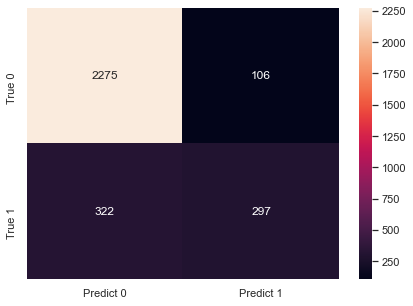

In [198]:
cm_adam3 = confusion_matrix(y_test.values, Y_pred_value_class_adam3)
df_cm_adam3 = pd.DataFrame(cm_adam3, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam3, annot=True, fmt = 'd');

In [199]:
row_index = row_index + 1

results_df_data = [ 4,'Adam',3,64,'relu',32,'LeakyReLU',1,'sigmoid', 0, 'No layer',0, 'No layer',
                   bankdata_model_adam3.history.history['loss'][-1], bankdata_model_adam3.history.history['accuracy'][-1], 
                   eva_results_adam3[0],eva_results_adam3[1],recall_score(y_test.values,Y_pred_value_class_adam3), 
                   precision_score(y_test.values, Y_pred_value_class_adam3), 
                   f1_score(y_test.values,Y_pred_value_class_adam3)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [200]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.301872,0.874143,0.356638,0.857333,0.479806,0.736973,0.581213


### 6.5  Case 5 using Adam optimizer  with LeakyRelu activation function , with 4 layers

##### Creating Model using Keras

In [201]:
bankdata_model_adam4 = Sequential()

### Adding layers to the model , with total 5 layers. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [202]:
bankdata_model_adam4.add(Dense(128, input_shape = (26,), activation = 'relu'))
bankdata_model_adam4.add(Dense(64, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_adam4.add(Dense(32, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_adam4.add(Dense(16, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_adam4.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [203]:
gd_optimizer_adam4 = optimizers.Adam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [204]:
bankdata_model_adam4.compile(optimizer = gd_optimizer_adam4, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [205]:
bankdata_model_adam4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               3456      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [206]:
bankdata_model_adam4.fit(X_train, y_train, batch_size = 500, epochs = 280, verbose = 1)

Train on 7000 samples
Epoch 1/280
7000/7000 [==============================] - 1s 98us/sample - loss: 0.5294 - accuracy: 0.7911
Epoch 2/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4355 - accuracy: 0.7979
Epoch 3/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3975 - accuracy: 0.8177
Epoch 4/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.3804 - accuracy: 0.8287
Epoch 5/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3680 - accuracy: 0.8391
Epoch 6/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3583 - accuracy: 0.8486
Epoch 7/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3497 - accuracy: 0.8543
Epoch 8/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3432 - accuracy: 0.8573
Epoch 9/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3387 - accuracy: 0.8623
Epoch 10/280
7000/7000 [=======

7000/7000 [==============================] - 0s 5us/sample - loss: 0.1491 - accuracy: 0.9431
Epoch 79/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1473 - accuracy: 0.9454
Epoch 80/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.1451 - accuracy: 0.9434
Epoch 81/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1399 - accuracy: 0.9491
Epoch 82/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.1318 - accuracy: 0.9550
Epoch 83/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.1417 - accuracy: 0.9464
Epoch 84/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.1428 - accuracy: 0.9464
Epoch 85/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.1546 - accuracy: 0.9400
Epoch 86/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1336 - accuracy: 0.9494
Epoch 87/280
7000/7000 [==============================] - 

7000/7000 [==============================] - 0s 9us/sample - loss: 0.0414 - accuracy: 0.9884
Epoch 155/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.0366 - accuracy: 0.9906
Epoch 156/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.0365 - accuracy: 0.9899
Epoch 157/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.0364 - accuracy: 0.9910
Epoch 158/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0370 - accuracy: 0.9907
Epoch 159/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.0374 - accuracy: 0.9887
Epoch 160/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0339 - accuracy: 0.9911
Epoch 161/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0344 - accuracy: 0.9909
Epoch 162/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0368 - accuracy: 0.9891
Epoch 163/280
7000/7000 [==========================

7000/7000 [==============================] - 0s 7us/sample - loss: 0.0442 - accuracy: 0.9839
Epoch 231/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0826 - accuracy: 0.9709
Epoch 232/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1170 - accuracy: 0.9623
Epoch 233/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.1321 - accuracy: 0.9600
Epoch 234/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1097 - accuracy: 0.9613
Epoch 235/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0984 - accuracy: 0.9644
Epoch 236/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.0441 - accuracy: 0.9841
Epoch 237/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.0337 - accuracy: 0.9884
Epoch 238/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0185 - accuracy: 0.9951
Epoch 239/280
7000/7000 [========================

### Shows model overfitted to Train data , with accuracy reaching 0.9997 

### Model Evaluation 

In [207]:
eva_results_adam4 = bankdata_model_adam4.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 77us/sample - loss: 1.8451 - accuracy: 0.8097


In [208]:
print(bankdata_model_adam4.metrics_names)
print(eva_results_adam4)

['loss', 'accuracy']
[1.8450690313975016, 0.8096667]


#### It can be seen that with Test data , accuracy drops , since model was overfitted to Train data

### 7.5 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [209]:
Y_pred_class_adam4 = bankdata_model_adam4.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_adam4)

3000/3000 [==============================] - 0s 19us/sample
[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [210]:
Y_pred_value_adam4 = bankdata_model_adam4.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_adam4)

3000/3000 [==============================] - 0s 11us/sample
[[9.9995279e-01]
 [8.4196631e-07]
 [7.2057623e-01]
 ...
 [2.4892017e-03]
 [1.0972284e-06]
 [4.1654080e-02]]


In [211]:
Y_pred_value_class_adam4 = (Y_pred_value_adam4 > 0.5).astype(int)
print(Y_pred_value_class_adam4)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_adam4, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2418, 1: 582}


## 8.5 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [212]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_adam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_adam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_adam4)))
confusion_matrix(y_test.values, Y_pred_class_adam4)

3000/3000 [==============================] - 0s 39us/sample - loss: 1.8451 - accuracy: 0.8097
Accuracy of Model with Adam optimizer :0.8096667
Recall_score: 0.5088852988691438
Precision_score: 0.5412371134020618
F-score: 0.5245628642797668


array([[2114,  267],
       [ 304,  315]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [213]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Adam optimizer :'+ str(bankdata_model_adam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_adam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_adam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_adam4)))
confusion_matrix(y_test.values, Y_pred_value_class_adam4)

3000/3000 [==============================] - 0s 41us/sample - loss: 1.8451 - accuracy: 0.8097
Accuracy of Model with Adam optimizer :0.8096667
Recall_score: 0.5088852988691438
Precision_score: 0.5412371134020618
F-score: 0.5245628642797668


array([[2114,  267],
       [ 304,  315]], dtype=int64)

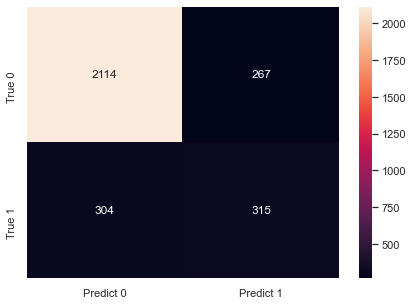

In [214]:
cm_adam4 = confusion_matrix(y_test.values, Y_pred_value_class_adam4)
df_cm_adam4 = pd.DataFrame(cm_adam4, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_adam4, annot=True, fmt = 'd');

In [215]:
row_index = row_index + 1

results_df_data = [ 5,'Adam',5,128,'relu',64,'LeakyReLU',32,'LeakyReLU',16,'LeakyReLU',1,'sigmoid', 
                   bankdata_model_adam4.history.history['loss'][-1],
                            bankdata_model_adam4.history.history['accuracy'][-1], eva_results_adam4[0],eva_results_adam4[1], 
                            recall_score(y_test.values,Y_pred_value_class_adam4), precision_score(y_test.values, 
                            Y_pred_value_class_adam4), f1_score(y_test.values,Y_pred_value_class_adam4)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [216]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.301872,0.874143,0.356638,0.857333,0.479806,0.736973,0.581213
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.004469,0.999143,1.845069,0.809667,0.508885,0.541237,0.524563


### 6.6 Case 6 using NAdam optimizer  with LeakyRelu activation function , with 4 layers

##### Creating Model using Keras

In [217]:
bankdata_model_nadam2 = Sequential()

### Adding layers to the model , with total 5 layers. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [218]:
bankdata_model_nadam2.add(Dense(128, input_shape = (26,), activation = 'relu'))
bankdata_model_nadam2.add(Dense(64, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam2.add(Dense(32, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam2.add(Dense(16, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam2.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [219]:
gd_optimizer_nadam2 = optimizers.Nadam(lr = 0.001, beta_1 = 0.8) ## use beta_1=0.8 (default=0.9) , beta_2 , epsilon as deafults

In [220]:
bankdata_model_nadam2.compile(optimizer = gd_optimizer_nadam2, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [221]:
bankdata_model_nadam2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               3456      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [222]:
bankdata_model_nadam2.fit(X_train, y_train, batch_size = 500, epochs = 280, verbose = 1)

Train on 7000 samples
Epoch 1/280
7000/7000 [==============================] - 1s 174us/sample - loss: 0.5822 - accuracy: 0.7394
Epoch 2/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4423 - accuracy: 0.8014
Epoch 3/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.3978 - accuracy: 0.8246
Epoch 4/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.3786 - accuracy: 0.8349
Epoch 5/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3669 - accuracy: 0.8451
Epoch 6/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3577 - accuracy: 0.8463
Epoch 7/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.3504 - accuracy: 0.8509
Epoch 8/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.3437 - accuracy: 0.8560
Epoch 9/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3387 - accuracy: 0.8571
Epoch 10/280
7000/7000 [======

7000/7000 [==============================] - 0s 7us/sample - loss: 0.2111 - accuracy: 0.9180
Epoch 79/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.2258 - accuracy: 0.9069
Epoch 80/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2235 - accuracy: 0.9089
Epoch 81/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.2231 - accuracy: 0.9084
Epoch 82/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.2027 - accuracy: 0.9196
Epoch 83/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.2195 - accuracy: 0.9091
Epoch 84/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2073 - accuracy: 0.9181
Epoch 85/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2287 - accuracy: 0.9054
Epoch 86/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.2246 - accuracy: 0.9099
Epoch 87/280
7000/7000 [==============================] - 0

7000/7000 [==============================] - 0s 8us/sample - loss: 0.1538 - accuracy: 0.9360
Epoch 155/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.1220 - accuracy: 0.9516
Epoch 156/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1363 - accuracy: 0.9400
Epoch 157/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1083 - accuracy: 0.9606
Epoch 158/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.1791 - accuracy: 0.9316
Epoch 159/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.1260 - accuracy: 0.9511
Epoch 160/280
7000/7000 [==============================] - 0s 11us/sample - loss: 0.1312 - accuracy: 0.9469
Epoch 161/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.1089 - accuracy: 0.9610
Epoch 162/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1691 - accuracy: 0.9366
Epoch 163/280
7000/7000 [=========================

7000/7000 [==============================] - 0s 9us/sample - loss: 0.1990 - accuracy: 0.9356
Epoch 231/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.0619 - accuracy: 0.9819
Epoch 232/280
7000/7000 [==============================] - 0s 11us/sample - loss: 0.0586 - accuracy: 0.9827
Epoch 233/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.0808 - accuracy: 0.9703
Epoch 234/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.0617 - accuracy: 0.9807
Epoch 235/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.0699 - accuracy: 0.9731
Epoch 236/280
7000/7000 [==============================] - 0s 12us/sample - loss: 0.0572 - accuracy: 0.9814
Epoch 237/280
7000/7000 [==============================] - 0s 12us/sample - loss: 0.1719 - accuracy: 0.9430
Epoch 238/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.0741 - accuracy: 0.9711
Epoch 239/280
7000/7000 [======================

### Shows model overfitted to Train data , with accuracy reaching 0.9997 

### Model Evaluation 

In [223]:
eva_results_nadam2 = bankdata_model_nadam2.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 116us/sample - loss: 1.0806 - accuracy: 0.8040


In [224]:
print(bankdata_model_nadam2.metrics_names)
print(eva_results_nadam2)

['loss', 'accuracy']
[1.080607545932134, 0.804]


#### It can be seen that with Test data , accuracy drops , since model was overfitted to Train data

### 7.6  Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [225]:
Y_pred_class_nadam2 = bankdata_model_nadam2.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam2)

3000/3000 [==============================] - 0s 33us/sample
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [226]:
Y_pred_value_nadam2 = bankdata_model_nadam2.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam2)

3000/3000 [==============================] - 0s 11us/sample
[[8.4153205e-02]
 [2.9145772e-06]
 [4.8174892e-02]
 ...
 [8.4420468e-04]
 [5.6957185e-02]
 [8.3362943e-01]]


In [227]:
Y_pred_value_class_nadam2 = (Y_pred_value_nadam2 > 0.5).astype(int)
print(Y_pred_value_class_nadam2)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_nadam2, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2431, 1: 569}


## 8.6 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [228]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam2)))
confusion_matrix(y_test.values, Y_pred_class_nadam2)

3000/3000 [==============================] - 0s 55us/sample - loss: 1.0806 - accuracy: 0.8040
Accuracy of Model with Nadam optimizer :0.804
Recall_score: 0.48465266558966075
Precision_score: 0.5272407732864675
F-score: 0.505050505050505


array([[2112,  269],
       [ 319,  300]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [229]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam2.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam2)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam2)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam2)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam2)

3000/3000 [==============================] - 0s 61us/sample - loss: 1.0806 - accuracy: 0.8040
Accuracy of Model with Nadam optimizer :0.804
Recall_score: 0.48465266558966075
Precision_score: 0.5272407732864675
F-score: 0.505050505050505


array([[2112,  269],
       [ 319,  300]], dtype=int64)

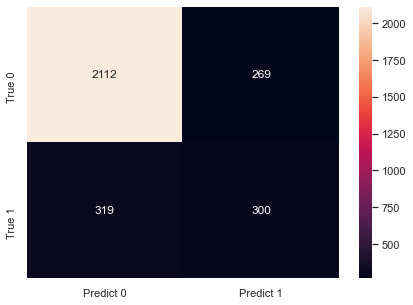

In [230]:
cm_nadam2 = confusion_matrix(y_test.values, Y_pred_value_class_nadam2)
df_cm_nadam2 = pd.DataFrame(cm_nadam2, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam2, annot=True, fmt = 'd');

In [231]:
row_index = row_index + 1

results_df_data = [ 6,'Nadam',5,128,'relu',64,'LeakyReLU',32,'LeakyReLU',16,'LeakyReLU',1,'sigmoid', 
                   bankdata_model_nadam2.history.history['loss'][-1],
                            bankdata_model_nadam2.history.history['accuracy'][-1], eva_results_nadam2[0],eva_results_nadam2[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam2), precision_score(y_test.values, 
                            Y_pred_value_class_nadam2), f1_score(y_test.values,Y_pred_value_class_nadam2)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [232]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.301872,0.874143,0.356638,0.857333,0.479806,0.736973,0.581213
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.004469,0.999143,1.845069,0.809667,0.508885,0.541237,0.524563
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.031885,0.993429,1.080608,0.804000,0.484653,0.527241,0.505051


### 6.7 Case 7 using NAdam optimizer  with LeakyRelu activation function , with 4 layers

##### Creating Model using Keras

In [233]:
bankdata_model_nadam3 = Sequential()

### Adding layers to the model , with total 4 layers. Here we add LeakyReLU as a layer since advanced activation is to be added as layer and not called as a function

In [234]:
bankdata_model_nadam3.add(Dense(64, input_shape = (26,), activation = 'relu'))
bankdata_model_nadam3.add(Dense(32, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam3.add(Dense(16, LeakyReLU(alpha=0.3)))  # changed alpha to 0.3 from 0.1
bankdata_model_nadam3.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [235]:
gd_optimizer_nadam3 = optimizers.Nadam(lr = 0.001, beta_1 = 0.8) ## use beta_1=0.8 (default=0.9) , beta_2 , epsilon as deafults

In [236]:
bankdata_model_nadam3.compile(optimizer = gd_optimizer_nadam3, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [237]:
bankdata_model_nadam3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [238]:
bankdata_model_nadam3.fit(X_train, y_train, batch_size = 500, epochs = 280, verbose = 1)

Train on 7000 samples
Epoch 1/280
7000/7000 [==============================] - 1s 108us/sample - loss: 0.6053 - accuracy: 0.7210
Epoch 2/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4715 - accuracy: 0.7974
Epoch 3/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.4257 - accuracy: 0.8029
Epoch 4/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.4026 - accuracy: 0.8167
Epoch 5/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3876 - accuracy: 0.8266
Epoch 6/280
7000/7000 [==============================] - 0s 9us/sample - loss: 0.3775 - accuracy: 0.8361
Epoch 7/280
7000/7000 [==============================] - 0s 6us/sample - loss: 0.3698 - accuracy: 0.8409
Epoch 8/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.3629 - accuracy: 0.8459
Epoch 9/280
7000/7000 [==============================] - 0s 10us/sample - loss: 0.3580 - accuracy: 0.8489
Epoch 10/280
7000/7000 [=====

7000/7000 [==============================] - 0s 4us/sample - loss: 0.2725 - accuracy: 0.8883
Epoch 78/280
7000/7000 [==============================] - 0s 8us/sample - loss: 0.2697 - accuracy: 0.8877
Epoch 79/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2720 - accuracy: 0.8880
Epoch 80/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2679 - accuracy: 0.8924
Epoch 81/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2720 - accuracy: 0.8900
Epoch 82/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2684 - accuracy: 0.8917
Epoch 83/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2637 - accuracy: 0.8909
Epoch 84/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2672 - accuracy: 0.8893
Epoch 85/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2620 - accuracy: 0.8954
Epoch 86/280
7000/7000 [==============================] - 0

7000/7000 [==============================] - 0s 4us/sample - loss: 0.2265 - accuracy: 0.9110
Epoch 154/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2193 - accuracy: 0.9129
Epoch 155/280
7000/7000 [==============================] - 0s 4us/sample - loss: 0.2202 - accuracy: 0.9116
Epoch 156/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2251 - accuracy: 0.9096
Epoch 157/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2216 - accuracy: 0.9103
Epoch 158/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.2207 - accuracy: 0.9101
Epoch 159/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2182 - accuracy: 0.9104
Epoch 160/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.2184 - accuracy: 0.9133
Epoch 161/280
7000/7000 [==============================] - 0s 4us/sample - loss: 0.2207 - accuracy: 0.9094
Epoch 162/280
7000/7000 [==========================

7000/7000 [==============================] - 0s 5us/sample - loss: 0.2021 - accuracy: 0.9194
Epoch 230/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.1881 - accuracy: 0.9250
Epoch 231/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1877 - accuracy: 0.9234
Epoch 232/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.1983 - accuracy: 0.9186
Epoch 233/280
7000/7000 [==============================] - 0s 4us/sample - loss: 0.1887 - accuracy: 0.9236
Epoch 234/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.1902 - accuracy: 0.9240
Epoch 235/280
7000/7000 [==============================] - 0s 4us/sample - loss: 0.1848 - accuracy: 0.9254
Epoch 236/280
7000/7000 [==============================] - 0s 7us/sample - loss: 0.1909 - accuracy: 0.9203
Epoch 237/280
7000/7000 [==============================] - 0s 5us/sample - loss: 0.1880 - accuracy: 0.9240
Epoch 238/280
7000/7000 [==========================

### Model Evaluation 

In [239]:
eva_results_nadam3 = bankdata_model_nadam3.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 83us/sample - loss: 0.5479 - accuracy: 0.8230


In [240]:
print(bankdata_model_nadam3.metrics_names)
print(eva_results_nadam3)

['loss', 'accuracy']
[0.5479014535744985, 0.823]


### 7.7  Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [241]:
Y_pred_class_nadam3 = bankdata_model_nadam3.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam3)

3000/3000 [==============================] - 0s 23us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [242]:
Y_pred_value_nadam3 = bankdata_model_nadam3.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam3)

3000/3000 [==============================] - 0s 6us/sample
[[0.06079349]
 [0.00165664]
 [0.67682034]
 ...
 [0.00151679]
 [0.00511691]
 [0.52763903]]


In [243]:
Y_pred_value_class_nadam3 = (Y_pred_value_nadam3 > 0.5).astype(int)
print(Y_pred_value_class_nadam3)

# Print predicted 1 and 0's 
unique, counts = np.unique(Y_pred_value_class_nadam3, return_counts = True)
print('\nThe number of predicted 1 (Exited) and 0 ( Not Exited) are :\n', dict(zip(unique, counts)))


[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]

The number of predicted 1 (Exited) and 0 ( Not Exited) are :
 {0: 2480, 1: 520}


## 8.7 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [244]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam3)))
confusion_matrix(y_test.values, Y_pred_class_nadam3)

3000/3000 [==============================] - 0s 34us/sample - loss: 0.5479 - accuracy: 0.8230
Accuracy of Model with Nadam optimizer :0.823
Recall_score: 0.4911147011308562
Precision_score: 0.5846153846153846
F-score: 0.5338015803336259


array([[2165,  216],
       [ 315,  304]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [245]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam3.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam3)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam3)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam3)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam3)

3000/3000 [==============================] - 0s 40us/sample - loss: 0.5479 - accuracy: 0.8230
Accuracy of Model with Nadam optimizer :0.823
Recall_score: 0.4911147011308562
Precision_score: 0.5846153846153846
F-score: 0.5338015803336259


array([[2165,  216],
       [ 315,  304]], dtype=int64)

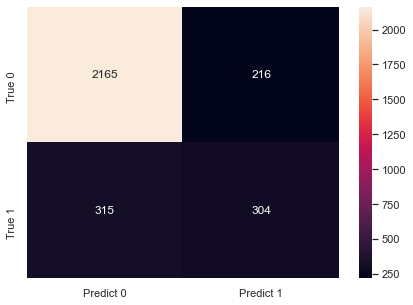

In [246]:
cm_nadam3 = confusion_matrix(y_test.values, Y_pred_value_class_nadam3)
df_cm_nadam3 = pd.DataFrame(cm_nadam3, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam3, annot=True, fmt = 'd');

In [247]:
row_index = row_index + 1

results_df_data = [ 7,'Nadam',4,64,'relu',32,'LeakyReLU',16,'LeakyReLU',1,'sigmoid',0,'No layer', 
                   bankdata_model_nadam3.history.history['loss'][-1],
                            bankdata_model_nadam3.history.history['accuracy'][-1], eva_results_nadam3[0],eva_results_nadam3[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam3), precision_score(y_test.values, 
                            Y_pred_value_class_nadam3), f1_score(y_test.values,Y_pred_value_class_nadam3)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [248]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.301872,0.874143,0.356638,0.857333,0.479806,0.736973,0.581213
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.004469,0.999143,1.845069,0.809667,0.508885,0.541237,0.524563
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.031885,0.993429,1.080608,0.804000,0.484653,0.527241,0.505051
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.169967,0.928714,0.547901,0.823000,0.491115,0.584615,0.533802


In [249]:
results_df1 = results_df.sort_values(by = ['Test data-Accuracy', 'F score'], ascending = False)
results_df1

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.301872,0.874143,0.356638,0.857333,0.479806,0.736973,0.581213
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.169967,0.928714,0.547901,0.823000,0.491115,0.584615,0.533802
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.004469,0.999143,1.845069,0.809667,0.508885,0.541237,0.524563
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.031885,0.993429,1.080608,0.804000,0.484653,0.527241,0.505051


### 6.8  Case 8 using Nadam optimizer

##### Creating Model using Keras

In [250]:
bankdata_model_nadam4 = Sequential()

### Adding layers to the model.

In [251]:
bankdata_model_nadam4.add(Dense(64, input_shape = (26,), activation = 'elu'))
bankdata_model_nadam4.add(Dense(32, activation = 'selu'))
bankdata_model_nadam4.add(Dense(1, activation = 'sigmoid'))  # sigmoid since we are classifying the data , to find out 'churn' possibility

In [252]:
gd_optimizer_nadam4 = optimizers.Nadam(lr = 0.001) ## use beta_1 , beta_2 , epsilon as deafults

In [253]:
bankdata_model_nadam4.compile(optimizer = gd_optimizer_nadam4, loss = 'binary_crossentropy', metrics=['accuracy'])

#### Model summary

In [254]:
bankdata_model_nadam4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                1728      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 33        
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


### Training model with forward pass and backpropogation 

In [255]:
bankdata_model_nadam4.fit(X_train, y_train, batch_size = 500, epochs = 40, verbose = 1)

Train on 7000 samples
Epoch 1/40
7000/7000 [==============================] - 1s 88us/sample - loss: 0.5025 - accuracy: 0.7730
Epoch 2/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.4178 - accuracy: 0.8121
Epoch 3/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3957 - accuracy: 0.8240
Epoch 4/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3842 - accuracy: 0.8277
Epoch 5/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3780 - accuracy: 0.8330
Epoch 6/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3731 - accuracy: 0.8361
Epoch 7/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3696 - accuracy: 0.8387
Epoch 8/40
7000/7000 [==============================] - 0s 7us/sample - loss: 0.3668 - accuracy: 0.8407
Epoch 9/40
7000/7000 [==============================] - 0s 9us/sample - loss: 0.3645 - accuracy: 0.8436
Epoch 10/40
7000/7000 [==================

### Model Evaluation 

In [256]:
eva_results_nadam4 = bankdata_model_nadam4.evaluate(X_test, y_test.values)

3000/3000 [==============================] - 0s 81us/sample - loss: 0.3587 - accuracy: 0.8547


In [257]:
print(bankdata_model_nadam4.metrics_names)
print(eva_results_nadam4)

['loss', 'accuracy']
[0.3587287753423055, 0.85466665]


### 7.8 Prediting using classes and probability , with threshold of 0.5

#### Option 1- using predict_classes ( without using threshold )

In [258]:
Y_pred_class_nadam4 = bankdata_model_nadam4.predict_classes(X_test, batch_size=200, verbose=1)
print(Y_pred_class_nadam4)

3000/3000 [==============================] - 0s 23us/sample
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


#### Option 2 - using predict to get predicted values of 'Exited' , based on which threshold of 0.5 can be applied

In [259]:
Y_pred_value_nadam4 = bankdata_model_nadam4.predict(X_test, batch_size=200, verbose=1)
print(Y_pred_value_nadam4)

3000/3000 [==============================] - 0s 11us/sample
[[0.20049213]
 [0.01622402]
 [0.7731446 ]
 ...
 [0.12699987]
 [0.04603673]
 [0.11327477]]


In [260]:
Y_pred_value_class_nadam4 = (Y_pred_value_nadam4 > 0.5).astype(int)
print(Y_pred_value_class_nadam4)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


## 8.8 Printing Accuracy scores and confusion matrix

### Confusion metrics - when using predict_classes method 

In [261]:
# Y_pred_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_class_nadam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_class_nadam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_class_nadam4)))
confusion_matrix(y_test.values, Y_pred_class_nadam4)

3000/3000 [==============================] - 0s 42us/sample - loss: 0.3587 - accuracy: 0.8547
Accuracy of Model with Nadam optimizer :0.85466665
Recall_score: 0.4717285945072698
Precision_score: 0.7281795511221946
F-score: 0.5725490196078432


array([[2272,  109],
       [ 327,  292]], dtype=int64)

### Confusion metrics - when using predict method that gives values , and where threshold of 0.5 has been applied

In [262]:
# Y_pred_value_class_nadam = bankdata_model.predict_classes(X_test, batch_size=200, verbose=1) # obtained earlier
print('Accuracy of Model with Nadam optimizer :'+ str(bankdata_model_nadam4.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_value_class_nadam4)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_value_class_nadam4)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_value_class_nadam4)))
confusion_matrix(y_test.values, Y_pred_value_class_nadam4)

3000/3000 [==============================] - 0s 37us/sample - loss: 0.3587 - accuracy: 0.8547
Accuracy of Model with Nadam optimizer :0.85466665
Recall_score: 0.4717285945072698
Precision_score: 0.7281795511221946
F-score: 0.5725490196078432


array([[2272,  109],
       [ 327,  292]], dtype=int64)

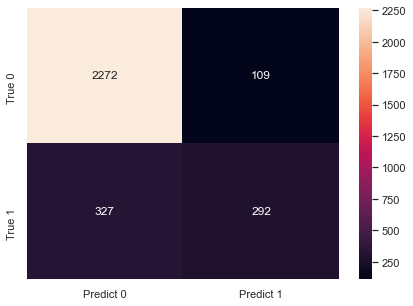

In [263]:
cm_nadam4 = confusion_matrix(y_test.values, Y_pred_value_class_nadam4)
df_cm_nadam4 = pd.DataFrame(cm_nadam4, index = [i for i in ["True 0", "True 1"]],
                     columns = [i for i in ["Predict 0", "Predict 1"]] )
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nadam4, annot=True, fmt = 'd');

In [264]:
row_index = row_index + 1

results_df_data = [ 8,'Nadam',3,64,'elu',32,'selu',1,'sigmoid', 0, 'No layer', 0,'No layer',
                   bankdata_model_nadam4.history.history['loss'][-1],
                            bankdata_model_nadam4.history.history['accuracy'][-1], eva_results_nadam4[0],eva_results_nadam4[1], 
                            recall_score(y_test.values,Y_pred_value_class_nadam4), precision_score(y_test.values, 
                            Y_pred_value_class_nadam4), f1_score(y_test.values,Y_pred_value_class_nadam4)]
results_df.loc[row_index] = results_df_data
#results_df = results_df.drop[0]

In [265]:
results_df

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.301872,0.874143,0.356638,0.857333,0.479806,0.736973,0.581213
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.004469,0.999143,1.845069,0.809667,0.508885,0.541237,0.524563
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.031885,0.993429,1.080608,0.804000,0.484653,0.527241,0.505051
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.169967,0.928714,0.547901,0.823000,0.491115,0.584615,0.533802
8,8,Nadam,3,64,elu,32,selu,1,sigmoid,0,No layer,0,No layer,0.334057,0.862857,0.358729,0.854667,0.471729,0.728180,0.572549


In [266]:
results_df1 = results_df.sort_values(by = ['Test data-Accuracy', 'F score'], ascending = False)
results_df1

,Case X,Model details,Num of layers,Layer 1 nodes,Layer1 Act F,Layer 2 nodes,Layer2 Act F,Layer 3 nodes,Layer3 Act F,Layer 4 nodes,Layer4 Act F,Layer 5 nodes,Layer5 Act F,Train data-loss,Train data-Accuracy,Test data-Loss,Test data-Accuracy,Recall score,Precision score,F score
3,3,Adam,3,64,elu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.325063,0.865714,0.350275,0.863000,0.465267,0.782609,0.583587
2,2,Nadam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.321304,0.868857,0.350789,0.861333,0.465267,0.772118,0.580645
1,1,Adam,3,64,elu,32,relu,1,sigmoid,0,No layer,0,No layer,0.324317,0.865429,0.355153,0.859667,0.447496,0.778090,0.568205
4,4,Adam,3,64,relu,32,LeakyReLU,1,sigmoid,0,No layer,0,No layer,0.301872,0.874143,0.356638,0.857333,0.479806,0.736973,0.581213
8,8,Nadam,3,64,elu,32,selu,1,sigmoid,0,No layer,0,No layer,0.334057,0.862857,0.358729,0.854667,0.471729,0.728180,0.572549
7,7,Nadam,4,64,relu,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0,No layer,0.169967,0.928714,0.547901,0.823000,0.491115,0.584615,0.533802
5,5,Adam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.004469,0.999143,1.845069,0.809667,0.508885,0.541237,0.524563
6,6,Nadam,5,128,relu,64,LeakyReLU,32,LeakyReLU,16,LeakyReLU,1,sigmoid,0.031885,0.993429,1.080608,0.804000,0.484653,0.527241,0.505051


## Observations - with all one hot encoding for Tenure etc , and with normalization , results are best